# Machine Learning Part



In [ ]:
import numpy as np
from numpy import load
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, classification_report, plot_roc_curve

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc

In [ ]:
# load data
data = load('QIS_EXAM_200Events.npz', allow_pickle=True)
lst = data.files
train = data['training_input']
test = data['test_input']

# prepare data
train_data = train[()]
test_data = test[()]

# prepare testing_data
for k, v in test_data.items():
    labels = np.array([k for k,v in test_data.items()])

zero_label_test = np.array([0]*len(test_data['0']))
one_label_test = np.array([1]*len(test_data['1']))
test_system_events = test_data['1']
test_background_events = test_data['0']

test_events = np.concatenate((test_background_events,test_system_events))      # events for testing
test_labels = np.concatenate((zero_label_test,one_label_test))                 # test events labels

In [ ]:
# prepare training_data
for k, v in train_data.items():
    labels = np.array([k for k,v in train_data.items()])

zero_label = np.array([0]*len(train_data['0']))                 # form numpy array for 0 labels
one_label = np.array([1]*len(train_data['1']))                  # form numpy array for 1 labels
system_events = train_data['1']
background_events = train_data['0']

events = np.concatenate((background_events,system_events))      # concat Signal events & Background events in one numpy array
labels = np.concatenate((zero_label,one_label))                 # concat Labels 0 & 1 for signal events and background events resp.


#### * Finding best parameters

In [ ]:
# learning rate

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(events,labels)
   train_pred = model.predict(events)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(test_events)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

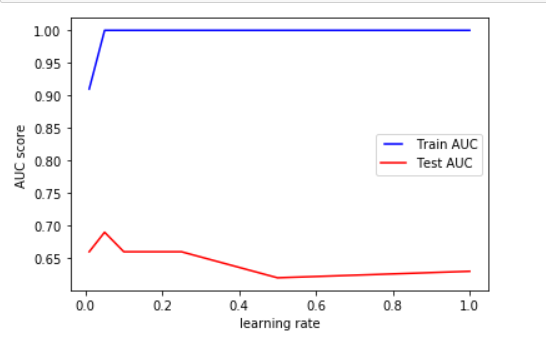

In [ ]:
# max_depth

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for eta in max_depths:
   model = GradientBoostingClassifier(max_depth=eta)
   model.fit(events,labels)
   train_pred = model.predict(events)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(test_events)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()

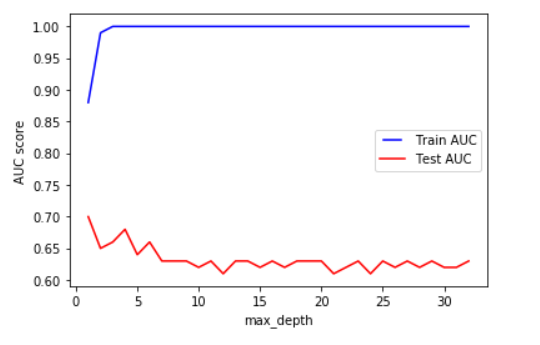

In [ ]:
# min_sample_split

min_samples_splits = [0.2, 0.4, 0.6, 0.8, 1.0]
train_results = []
test_results = []
for eta in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=eta)
   model.fit(events,labels)
   train_pred = model.predict(events)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(test_events)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.show()

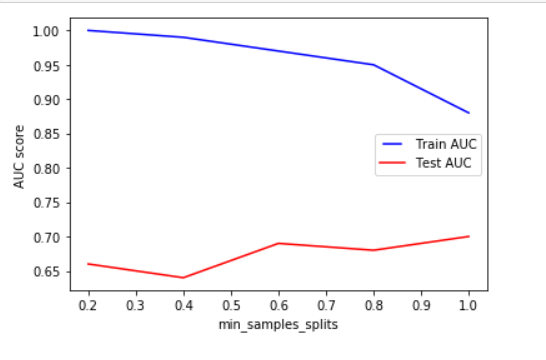

In [ ]:
# max_samples_leaf

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for eta in min_samples_leafs:
   model = GradientBoostingClassifier(min_samples_leaf=eta)
   model.fit(events,labels)
   train_pred = model.predict(events)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(test_events)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')
plt.show()

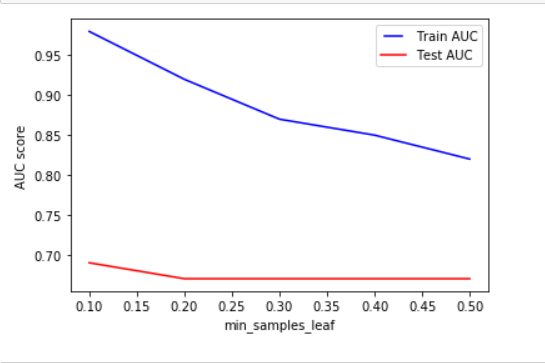

In [ ]:
# n_estimators

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for eta in n_estimators:
   model = GradientBoostingClassifier(n_estimators=eta)
   model.fit(events,labels)
   train_pred = model.predict(events)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(labels, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(test_events)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

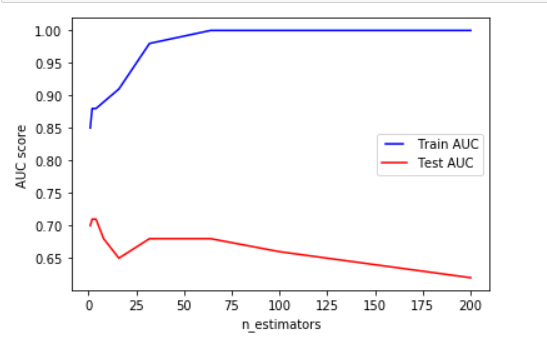

In [ ]:
# Train GBClassifier
# Using best hyperparameters

decision_boosted = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=1.0,
    min_samples_leaf=0.5,
    n_estimators=2,
    )
decision_boosted.fit(events,labels)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, <br>
                          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$learning_rate=0.01, loss='deviance', max_depth=3,<br>
                           $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$max_features=None, max_leaf_nodes=None,<br>
                           $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$min_impurity_decrease=0.0, min_impurity_split=None,<br>
                           $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$min_samples_leaf=0.5, min_samples_split=1.0,<br>
                           $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$min_weight_fraction_leaf=0.0, n_estimators=2,<br>
                           $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$n_iter_no_change=None, presort='deprecated',<br>
                           $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$random_state=None, subsample=1.0, tol=0.0001,<br>
                           $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$validation_fraction=0.1, verbose=0,<br>
                           $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$warm_start=False)

In [ ]:
# GBclassifier prediction

predictions_decision_boosted = decision_boosted.predict(test_events)      # predict on test_events

acc = accuracy_score(test_labels, predictions_decision_boosted)
print("Classification Accuracy: {}".format(acc))

# Classification report

print(classification_report(test_labels, predictions_decision_boosted))

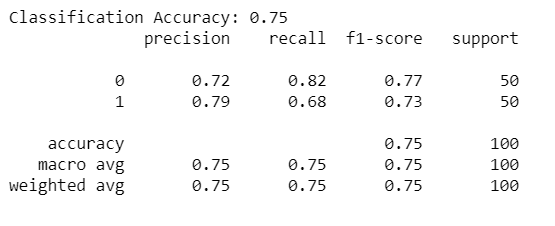

In [ ]:
# Area under ROC curve(AUC)

roc_auc_score(test_labels , predictions_decision_boosted)
plot_roc_curve(decision_boosted,test_events,test_labels)

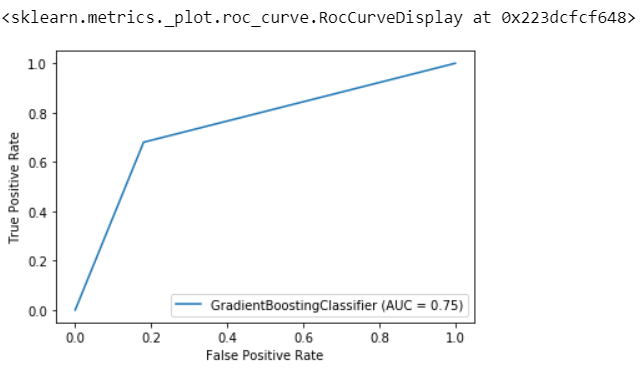

 ## -------------------------------------------------------------------------------------------------------------------------------

# Quantum Computing Part



1) implement a simple quantum operation with Cirq

    a)With 5 qubits     
    b)Apply Hadamard operation on every qubit
    c)Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
    d)SWAP (0, 4)
    e)Rotate X with pi/2
    f)Plot the circuit


In [ ]:
import cirq
from cirq.ops import CNOT
import numpy as np

In [ ]:
q0, q1, q2, q3, q4 = (cirq.GridQubit(0,0), cirq.GridQubit(0,1), cirq.GridQubit(0,2), cirq.GridQubit(0,3), cirq.GridQubit(0,4))

qubits = [q0,q1,q2,q3,q4]

In [ ]:
circuit = cirq.Circuit()

In [ ]:
circuit.append(cirq.H(q) for q in qubits)   # Apply Hadamard operation on each qubit

In [ ]:
circuit.append(CNOT.on(q0,q1))              # CNOT operation on qubit first two qubits
circuit.append(cirq.rx(np.pi/2).on(q1))     # Rotate X by pi/2
circuit.append(CNOT.on(q1,q2))   
circuit.append(cirq.rx(np.pi/2).on(q2))
circuit.append(CNOT.on(q2,q3))
circuit.append(cirq.rx(np.pi/2).on(q3))   
circuit.append(CNOT.on(q3,q4))   
circuit.append(cirq.rx(np.pi/2).on(q4))  

In [ ]:
circuit.append(cirq.SWAP(q0,q3))            # SWAP (0,4)

In [ ]:
print(circuit)                              #Plot the circuit

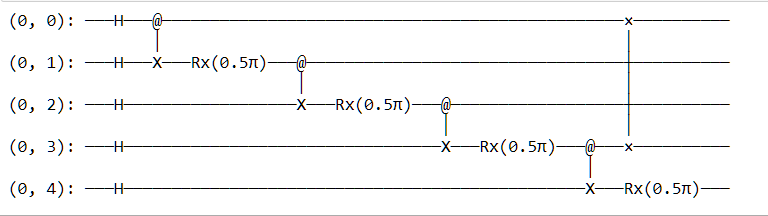

2) Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩          state. For example, for a qubit, at first, you can rotate 0.1 degree, you get one probability of measuring the state in the      |0⟩ state; then you rotate another 0.1 degree in addition, you get another probability; then you another 0.1 degree and so       on.

In [ ]:
import cirq
import numpy as np
from cirq import Simulator

q = cirq.NamedQubit('qubit')        #qubit
degree = 0.1*np.pi/180              #rotate 0.1 degree
for i in range(10):
    circuit = cirq.Circuit(cirq.rx(degree).on(q), cirq.measure(q))
    degree+=degree
    print(circuit)
    simulator = Simulator()         
    result = simulator.run(circuit, repetitions=100)
    print(result.histogram(key='qubit'))

qubit: ───Rx(0.001π)───M───
Counter({0: 100})

qubit: ───Rx(0.001π)───M───
Counter({0: 100})

qubit: ───Rx(0.002π)───M───
Counter({0: 100})

qubit: ───Rx(0.004π)───M───
Counter({0: 100})

qubit: ───Rx(0.009π)───M───
Counter({0: 100})

qubit: ───Rx(0.018π)───M───
Counter({0: 100})

qubit: ───Rx(0.036π)───M───
Counter({0: 100})

qubit: ───Rx(0.071π)───M───
Counter({0: 99, 1: 1})

qubit: ───Rx(0.142π)───M───
Counter({0: 94, 1: 6})

qubit: ───Rx(0.284π)───M───
Counter({0: 86, 1: 14})